# Exponential Distribution

The Exponential distribution arises out of processes involving either temporal or spatial distances between events. The canonical example is that of time *between* arrivals of customers at a bank or coffee shop. The general name for such a generating process is a Poisson process and a number of probability distributions arise out of such processes. There are a number of key assumptions surrounding Poisson processes including:

* continuous
* constant average rate
* independent events

Therefore, if the *average* rate of phone calls is constant, if phone calls occur continuously (or approximately so), and if the phone calls are independent, the time between phone calls will follow an Exponential distribution. As with all such distributions, they are *models* and we can often use the models even if various assumptions are not met. We indicate a random variable $X$ distributed according to the Exponential distribution as $X \sim exp(\lambda)$ although it is often seen as $X \sim exp(\beta)$ where $\lambda = \frac{1}{\beta}$ so some care is required.

For now, we want to tell a different generating story for the Exponential distribution. The Exponential distribution is characterized by a single parameter, $\lambda$, called the rate parameter. This is the rate of death per unit of time or rate of phone calls per unit of time. For now, we're going to take this as some kind of general failure rate.

Let us assume we have a system of a single component that fails if that component fails. The component lasts anywhere from 1 to 365 days which we can model with a (discrete) Uniform distribution, which we saw in a previous section. 

We could simulate this process as we've done before and generate the following data (printing out the first 10 to inspect).

In [1]:
from numpy.random import randint, seed
import numpy as np

In [2]:
seed(1504120447)

In [3]:
data = randint(1, 366, 10000)
data[0:10]

array([170, 144, 293, 134, 250, 291, 337, 334, 125, 143])

So what does that look like as a histogram of days to failure:

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

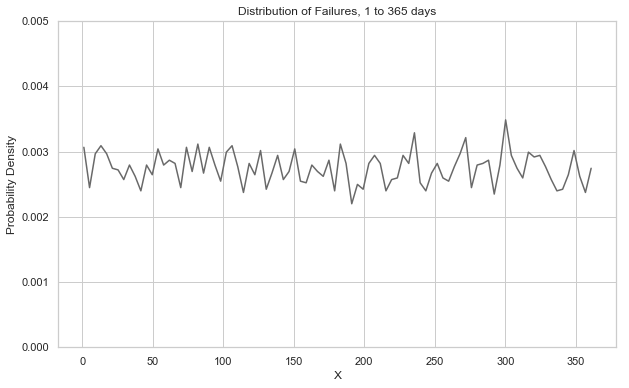

In [6]:
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)

values, base = np.histogram( data, bins=90, density=True)
axes.plot( base[:-1], values, color="DimGray")
axes.set_title( "Distribution of Failures, 1 to 365 days")
axes.set_ylabel( "Probability Density")
axes.set_xlabel( "X")
axes.set_ylim(0, 0.005)

plt.show()
plt.close()

which is about as we'd expect. We have 10,000 processes whose behavior can be characterized by a Uniform distribution and the sum of those Uniform distributions is itself Uniform.

Now we're going to change it up a bit. We assume that we have 10,000 systems as before except that each system has 3 components. Each component fails in 1 to 365 days but the entire system fails as soon as *any* of the 3 components fails. The parameters for `randint` are: min, max, number of samples. We want 3 in this case.

In [7]:
np.min( randint(1, 366, 3))

67

In [8]:
data = np.array([np.min(randint(1, 366, 3)) for _ in range(10000)])
data[0:10]

array([187,  37,  59, 226,  19, 129, 131, 113, 210,  21])

And we'll plot this again:

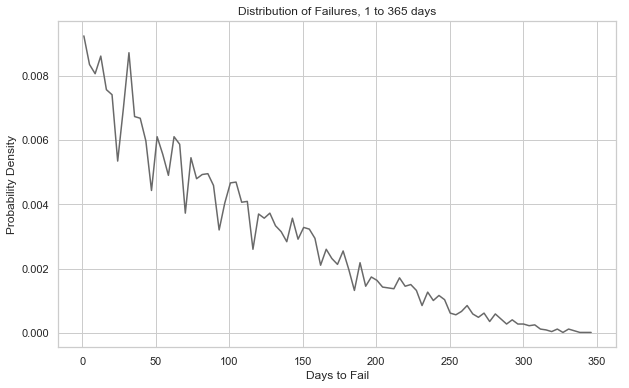

In [9]:
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)

values, base = np.histogram( data, bins=91, density=True)
axes.plot( base[:-1], values, color="DimGray")
axes.set_title( "Distribution of Failures, 1 to 365 days")
axes.set_ylabel( "Probability Density")
axes.set_xlabel( "Days to Fail")

plt.show()
plt.close()

This is interesting. As the system has gotten more complicated, under our assumptions, it has gotten more fragile. Our systems have a higher probability of failing within 1 to 50 days than in 300 to 350 days which is very different than before. More systems fail earlier. What if we up the number of components to 10?

In [10]:
data = np.array([np.min(randint(1, 366, 10)) for _ in range(10000)])
data[0:10]

array([ 22,   4, 190,   9,   5,  58,  82,  60,   3,  63])

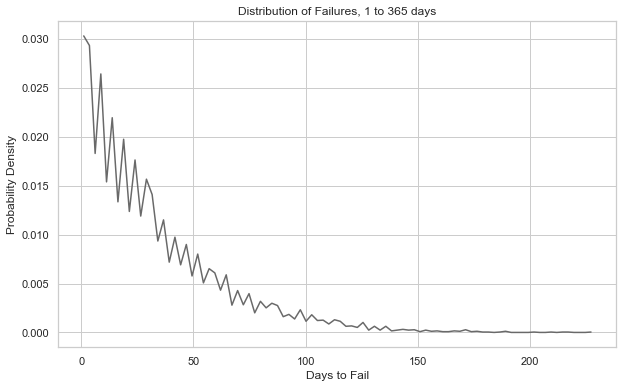

In [11]:
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)

values, base = np.histogram( data, bins=90, density=True)
axes.plot( base[:-1], values, color="DimGray")
axes.set_title( "Distribution of Failures, 1 to 365 days")
axes.set_ylabel( "Probability Density")
axes.set_xlabel( "Days to Fail")

plt.show()
plt.close()

At this point, we are almost exactly what the corresponding Exponential distribution would be. If we take the average of days to failure:

In [12]:
days_to_failure = np.mean( data) # beta
days_to_failure

33.6652

we get a parameter often called $\beta$. It turns out that $\lambda = \frac{1}{\beta}$ so `failures_per_day` here is the number of system failures we see per day.

In [13]:
failures_per_day = 1/days_to_failure # lambda
failures_per_day

0.029704264344189255

If we start with or have the rate, of course, we can always invert *that* to get the time we have to wait (on average) to see a failure or `days_to_failure`. Scipy's `expon` function is parameterized in terms of $\beta$ rather than $\lambda$. Pay attention to your library's documentation. If you have one, you can always get to the other.

In [14]:
from scipy.stats import expon

In [15]:
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step

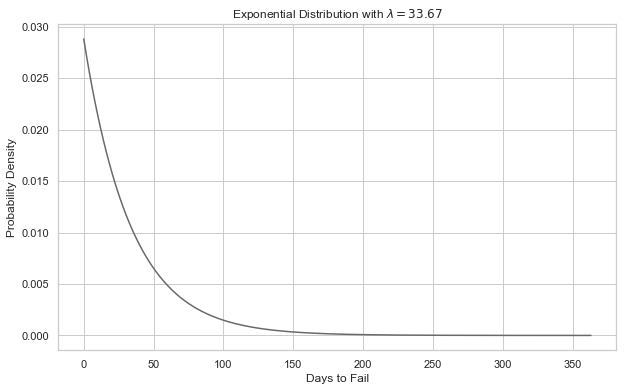

In [16]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)
axes.set_title( "Exponential Distribution with $\lambda=%.2f$" % days_to_failure)
axes.set_ylabel( "Probability Density")
axes.set_xlabel( "Days to Fail")

xs = [expon.pdf( k, 0, days_to_failure) for k in drange( 1, 365, 1)]
axes.plot( xs, color="DimGray")

plt.show()
plt.close()

One think to keep an eye on are the different representations and presentations of probability distributions in different contexts. 

Mathematically, the Exponential distribution is parameterized in terms of $\lambda$ or wait time (for example, "days until a failture), the *code* from the Scipy library actually takes the rate, $\beta$, (for example, "failures per day"). You should make sure you read the documentation of the libraries you use as this sort of thing happens quite a lot when dealing with mathematical distributions.

It's worth mentioning that we just derived the Exponential distribution using the rather famous *Central Limit Theorem*. But wait, what? Doesn't the Central Limit Theorem prove that a combination of random variables leads to a *Normal* distribution? Actually, no. That's just the most famous example. What the Central Limit Theorem actually says is that combinations of random variables tend towards specific *limiting distributions*. What limiting distribution depends on how the random variables are combined or interact. Here the variables interact in such a way (using `min`) that we get the Exponential distribution. Later, we will see what's required for the the Central Limit Theorem to result in a Normal distribution as well as a Log-Normal distribution.

## Estimation

We've basically seen the main components of the Exponential distribution. Let's take the example of a call center.

If your call center receives 2 calls per hour ($\beta$) *on average* then the time between calls ($\lambda$) is 0.5 hours on average. In order to estimate the Exponential distribution from data, you need to have data expressed in terms of events per unit just like calls per hour.

The Method of Moments estimate of $\beta$ is:

$\hat{\beta} = m_1$

and as we've already mentioned, $\lambda = \frac{1}{\beta}$, so:

$\hat{\lambda} = \frac{1}{\hat{beta}}$

$mean = \beta = \frac{1}{\lambda}$

but

$variance = \beta^2 = \frac{1}{\lambda^2}$

this is another one of those cases where *if* you are using data that is distributed according to the Exponential distribution, the data's variance is not what a descriptive statistics function is going to spit out.

## Memoryless

One of the key characteristics of the Exponential distribution is that it is memoryless. If you wait for an event, stop, and then continue to wait, the distribution of time between events still follows the same Exponential distribution. For example, if you wait for a phone call, the Exponential distribution may say that from the last phone, it may take 5 minutes. 3 minutes in you may stop waiting and then resume waiting 10 minutes later. The next phone call is still most likely to take 5 minutes to occur on average.

Because of this, the Exponential distribution is not a good model for situations that *require* memory. For example, the Exponential distribution is not a good model for the death rate of humans, largely because our components don't have binary states of failure.

## Shifted Exponential Distribution

It is sometimes the case that there is a *minimum* amount of time that occurs between events, $L$, instead of 0. A good example of this is something like compile times or run times. Given a CPU and memory and absolutely no other processes running, it may take 10 minutes for a codebase to compile. If you recompile it, other processes may be running and so the compile time will be longer. In general, the compile times will have an Exponential distribution but the lowest value will be 10 minutes or $L$.

In such a case, we need to model our process with a *Shifted* Exponential Distribution, $X \sim Exp(\lambda, L)$. The general approach to such modeling is to estimate $\hat{L}$ using the mininmum value of your data set, subtract $\hat{L}$ from your data set, estimate $\lambda$ and use those two parameters for your Exponential distribution.

This illustrates up a very important point. Models like this are only good for *stationary* processes. As the codebase increases, we naturally expect $L$ to increase which means that overtime, we need to re-estimate our model. We'll talk more about this later.

## Gamma Distribution

The Exponential distribution is a special case of the Gamma distribution. The Gamma distribution arises most generally in waiting times between Poisson distributed events (we'll talk about the Poisson distribution shortly...Poisson distributions are counts).

In one of the parameterizations of the Gamma distribution (there are several), the Gamma distribution is described by a shape parameter $k$ and scale parameter $\theta$. If $X \sim Gamma(1, \frac{1}{\lambda})$ then $X ~ \sim Exp(\lambda)$. $k$ is the number of occurences of the event and $\theta$ is the mean number events per (time/space) unit. It is what we've called $\beta$ before (sorry, notation for these is not consistent--I do try, though).

So what does this mean in terms of the Exponential distribution? Our Poisson distributed event is a single failure ("occurence" or "success") of any of the $n$ components. The Gamma distribution is useful in cases where $k > 1$.

The Method of Moments estimators are:

$\hat{k} = \frac{m_1^2}{m_2}$

$\hat{\theta} = \frac{m_2}{m_1}$

Note that libraries parameterize the Gamma distribution in a variety of ways. You may actually see $b$ instead of $k$ which is just $\frac{1}{k}$ (as is $scale = \beta = \theta = \frac{1}{\lambda}$. You may need to "play" with the library to see what it's doing if the documentation isn't clear.

The mean and variance are:

$mean = k\theta$

$variance = k\theta^2$

Again, there are other parameterizations and many uses for the Gamma distribution [Wikipedia](https://en.wikipedia.org/wiki/Gamma_distribution).

## Erlang Distribution

The Erlang distribution describes waiting times in queueing systems. It was developed by A. K. Erlang and is another special case of the Gamma distribution where $k$ is an integer. The Erlang distribution is the *sum* of $k$ independent variables $x_i \sim exp(\lambda)$. [Wikipedia](https://en.wikipedia.org/wiki/Erlang_distribution)

## Weibull Distribution

Finally, the Weibull distribution is a variation on the Exponential distribution that is *not* memoryless. If you find that the process you wish to model *does* depend on time then you may want to consider a Weibull distribution.

As with the Gamma distribution, the Weibull distribution has two parameters $k$, for "shape", and $\lambda$, for the "rate" (sometimes parameterized with the inverse or "scale"). The key advantage of the Weibull distribution over the Exponential is in the $k$ which has the following interpretations:

* $k < 1$ - the failure rate is decreasing over time. This represents a "fail fast" process.
* $k = 1$ - the failure rate is constant over time (the Exponential distribution).
* $k > 1$ - the failure rate is increasing over time. This represents an "aging" process.

There are entire books on the Weibull distribution and its uses. [Wikipedia](https://en.wikipedia.org/wiki/Weibull_distribution)

The mean and variance as well as the parameters are a bit complicated because they are functions of $k$ (and because they depend on time, ultimately $t$).

$mean = \lambda \Gamma(1 + \frac{1}{k})$

$variance = \lambda^2 [\Gamma(1+\frac{2}{k}) - (\Gamma(1 + \frac{1}{k}))^2]$

where $\Gamma()$ is the gamma *function*. If you decide that a Weibull distribution would be a good model for your data, you should consult a good reference.